In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [340]:
data = pd.read_csv('D:\\Python\\Codes\\OnlineRetail.csv', encoding='latin1')
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [341]:
#تیدیل تاریخ دیتاست به فرمت تاریخ  با تایع --------> to_datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [342]:
#تبدیل تاریخ به شکل خواندنی و  -------> For Exampl 201106
data['MY_invoiceYearMonth'] = data['InvoiceDate'].map(lambda date : 100*date.year + date.month)
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,MY_invoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012


In [343]:
# محاسبه قیمت هر فاکتور باضرب تعداد خریده آن محصول در قیمت آن محصل  -------> Revenue for each InvoiceNo
data['MY_Revenue'] = data['UnitPrice'] * data['Quantity']
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,MY_invoiceYearMonth,MY_Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34


In [344]:
#جمع تمام فاکتورهای هر ماه_____Grouped base on Year and Month fo sum Revenue 
Monthly_revenue = data.groupby(['MY_invoiceYearMonth'])['MY_Revenue'].sum().reset_index()
Monthly_revenue


,MY_invoiceYearMonth,MY_Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


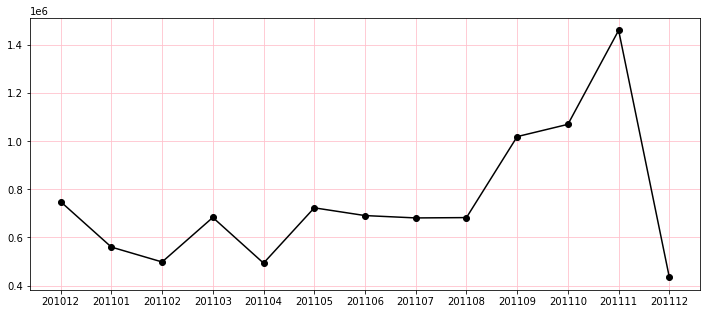

In [345]:
# X ---->Final_Revenue['MY_invoiceYearMonth'] and  Y ----> Final_Revenue['MY_Revenue'])

plt.figure(figsize=(12,5))
plt.plot(Monthly_revenue['MY_invoiceYearMonth'].to_numpy(dtype = str), Monthly_revenue['MY_Revenue'], marker='o',c = 'black')
plt.grid(c="pink")

In [346]:
# محاسبه میزان تغییر فروش با تایع ----> pct_change()
Monthly_revenue ['MY_MonthlyGrowth'] = Monthly_revenue['MY_Revenue'].pct_change()
Monthly_revenue

,MY_invoiceYearMonth,MY_Revenue,MY_MonthlyGrowth
0,201012,748957.020,NaN
1,201101,560000.260,-0.252293
2,201102,498062.650,-0.110603
3,201103,683267.080,0.371850
4,201104,493207.121,-0.278163
5,201105,723333.510,0.466592
6,201106,691123.120,-0.044530
7,201107,681300.111,-0.014213
8,201108,682680.510,0.002026
9,201109,1019687.622,0.493653


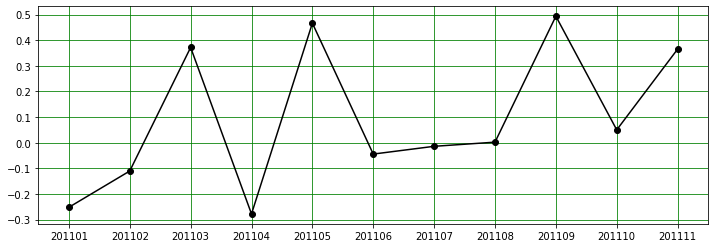

In [347]:
#پلات رشد ماهیانه 
plt.figure(figsize=(12,4))
plt.grid(c="green")
plt.plot(Monthly_revenue.query("MY_invoiceYearMonth < 201112")['MY_invoiceYearMonth'].to_numpy(dtype = str), Monthly_revenue.query("MY_invoiceYearMonth < 201112")['MY_MonthlyGrowth'] , marker='o', c = 'black' )


In [348]:
#ایجاد دیتا فرم فقط با مشتریان انگلیسی
uk = data.query("Country=='United Kingdom'").reset_index(drop=True)

#  ایجاد دیتا فریم مشتریان فعال انگلیسی بر اساس شناسه مشتری واحد
monthly_active_uk = uk.groupby('MY_invoiceYearMonth')['CustomerID'].nunique().reset_index()
monthly_active_uk

,MY_invoiceYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


<BarContainer object of 13 artists>

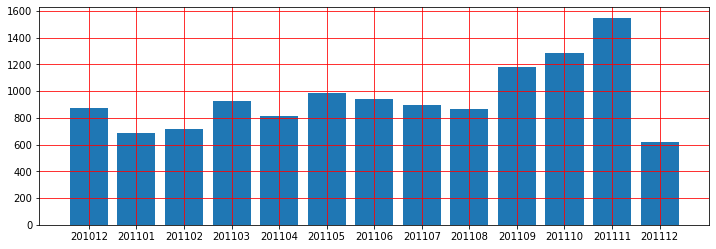

In [349]:
# رسم تعداد مشتریان انگلستانی واحد در هر ماه
plt.figure(figsize=(12,4))
plt.grid(c="red")
#  محور افقی ماه های سال _____ محور عمودی تعداد مشتریان انگلستانی
plt.bar(monthly_active_uk['MY_invoiceYearMonth'].to_numpy(dtype=str),monthly_active_uk['CustomerID'])

In [350]:
#ایجاد دیتا فریم بر اساس تعداد فروش در ماه به مشتریان انگلستانی
tx_monthly_sales = uk.groupby('MY_invoiceYearMonth')['Quantity'].sum().reset_index()
tx_monthly_sales

,MY_invoiceYearMonth,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666
5,201105,306452
6,201106,258522
7,201107,324129
8,201108,319804
9,201109,458490


In [351]:
# پلات میزان تعدادخرید در هر ماه  ____ محور افقی تعداد خریدهای مشتریان انگلستانی
plt.figure(figsize=(12,4))
plt.grid()
plt.bar(tx_monthly_sales['










'].to_numpy(dtype=str),tx_monthly_sales['Quantity'])

SyntaxError: EOL while scanning string literal (Temp/ipykernel_12052/1055360822.py, line 4)

In [ ]:
# ایجاد دیتا فریم بر اساس اولین تاریخ خرید مشتریان انگلستانی
First_purchase = uk.groupby('CustomerID').InvoiceDate.min().reset_index()

#Define Column name
First_purchase.columns = ['CustomerID','FirstPurcheseDate']

#تبدیل تاریخ به شکل خواندنی و راحت  -------> For Exampl 201106
First_purchase['FisrtPurchaseYearMonth'] = First_purchase['FirstPurcheseDate'].map(lambda date: 100*date.year + date.month)

First_purchase


,CustomerID,FirstPurcheseDate,FisrtPurchaseYearMonth
0,12346.0,2011-01-18 10:01:00,201101
1,12747.0,2010-12-05 15:38:00,201012
2,12748.0,2010-12-01 12:48:00,201012
3,12749.0,2011-05-10 15:25:00,201105
4,12820.0,2011-01-17 12:34:00,201101
...,...,...,...
3945,18280.0,2011-03-07 09:52:00,201103
3946,18281.0,2011-06-12 10:53:00,201106
3947,18282.0,2011-08-05 13:35:00,201108
3948,18283.0,2011-01-06 14:14:00,201101


In [ ]:
#افزودن دو ستون اولین روز و ماه خرید به دیتا فریم اصلی با مطابقت شماره مشتریان انگلـــــــســــی
uk = pd.merge(uk, First_purchase, on='CustomerID')
uk.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,MY_invoiceYearMonth,MY_Revenue,FirstPurcheseDate,FisrtPurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012


In [ ]:
#ایجاد ستونی برای نشان دادن مشتری جدید یا موجود
# اگر تاریخ خرید مشتری قبل از تاریخ فاکتور انتخاب شده باشد کاربر موجود است
#if User's First Purchase Year Month before the selected Invoice Year Month
uk['MY_UserType'] = 'New' # ابتدا برای همه مقدار جدید را در نظر میگیرد
#در هر سر اگر تاریخ فاکتوری از تاریخ خرید از تاریخ اولین خرید بیشتر بود و بعد آن بود ضعیت مشتری به موجود تبدیل شود
uk.loc[uk['MY_invoiceYearMonth']>uk['FisrtPurchaseYearMonth'],'MY_UserType'] = 'Existing'
uk.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,MY_invoiceYearMonth,MY_Revenue,FirstPurcheseDate,FisrtPurchaseYearMonth,MY_UserType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New


In [ ]:
#محاسبه سود ماهانه برای هر 2نوع مشتری 
User_type_revenue = uk.groupby(['MY_invoiceYearMonth','MY_UserType'])['MY_Revenue'].sum().reset_index()

# چون برای ماه آخر و اول مشتری جدید و موجود معنی ندارد حذفشان میکنیم از پلات
User_type_revenue= User_type_revenue.query("MY_invoiceYearMonth != 201012 and MY_invoiceYearMonth != 201112")

User_type_revenue

,MY_invoiceYearMonth,MY_UserType,MY_Revenue
1,201101,Existing,195275.510
2,201101,New,156705.770
3,201102,Existing,220994.630
4,201102,New,127859.000
5,201103,Existing,296350.030
6,201103,New,160567.840
7,201104,Existing,268226.660
8,201104,New,108517.751
9,201105,Existing,434725.860
10,201105,New,90847.490


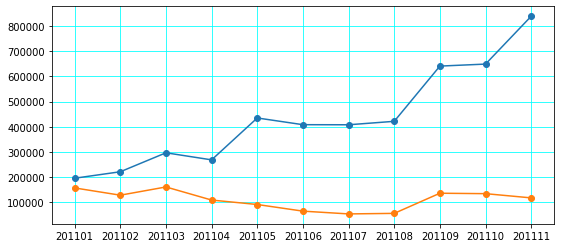

In [ ]:
plt.figure(figsize=(9,4))
plt.grid(c='cyan')
#سود حاصل از مشتریان انگلستانی قدیمی
plt.plot(User_type_revenue.query("MY_UserType=='Existing'")['MY_invoiceYearMonth'].to_numpy(dtype=str) ,User_type_revenue.query("MY_UserType=='Existing'")['MY_Revenue'] ,marker="o")
#سود حاصل از مشتریان انگلستانی جدید
plt.plot(User_type_revenue.query("MY_UserType=='New'")['MY_invoiceYearMonth'].to_numpy(dtype=str) ,User_type_revenue.query("MY_UserType=='New'")['MY_Revenue'] ,marker="o")

In [ ]:
#محاسبه نرخ ______مشتــــریان جــــــدیـــــد_____ در هر ماه با تقسیم تعدادمشتری جدید به تعداد مشتریان موجود
User_ratio = (uk.query("MY_UserType == 'New'").groupby(['MY_invoiceYearMonth'])['CustomerID'].nunique()/uk.query("MY_UserType == 'Existing'").groupby(['MY_invoiceYearMonth'])['CustomerID'].nunique()).reset_index()
User_ratio = User_ratio.dropna() # حذف NaN در ستون های دیتاست
User_ratio

,MY_invoiceYearMonth,CustomerID
1,201101,1.124224
2,201102,0.904000
3,201103,0.792233
4,201104,0.510166
5,201105,0.343793
6,201106,0.281250
7,201107,0.236589
8,201108,0.192572
9,201109,0.304878
10,201110,0.328852


<BarContainer object of 10 artists>

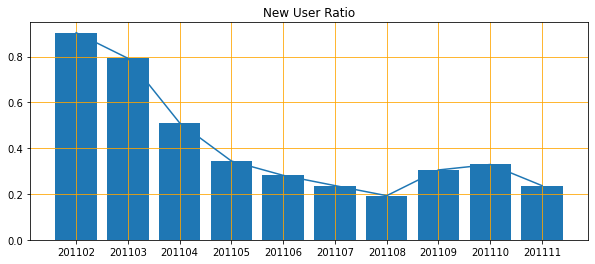

In [ ]:
#نرخ رشد تعداد ______مشتــــریان جــــــدیـــــد_____ در هر ماه
plt.figure(figsize=(10,4))
plt.title('New User Ratio')
plt.grid(c="orange")
plt.plot(User_ratio.query("MY_invoiceYearMonth > 201101 and MY_invoiceYearMonth < 201112")['MY_invoiceYearMonth'].to_numpy(dtype=str),User_ratio.query("MY_invoiceYearMonth > 201101 and MY_invoiceYearMonth < 201112")['CustomerID'])
plt.bar(User_ratio.query("MY_invoiceYearMonth > 201101 and MY_invoiceYearMonth < 201112")['MY_invoiceYearMonth'].to_numpy(dtype=str),User_ratio.query("MY_invoiceYearMonth > 201101 and MY_invoiceYearMonth < 201112")['CustomerID'])


In [ ]:
######### محاسبه monthly Retantion rate3 ##########

#مبلغ خرید هر مشتری مشخص در ماه که نشان دهنده فعال بودن مشتری است
User_purchases = uk.groupby(['CustomerID','MY_invoiceYearMonth','MY_UserType'])['MY_Revenue'].sum().reset_index()
User_purchases

,CustomerID,MY_invoiceYearMonth,MY_UserType,MY_Revenue
0,12346.0,201101,New,0.00
1,12747.0,201012,New,706.27
2,12747.0,201101,Existing,303.04
3,12747.0,201103,Existing,310.78
4,12747.0,201105,Existing,771.31
...,...,...,...,...
12325,18283.0,201110,Existing,114.65
12326,18283.0,201111,Existing,651.56
12327,18283.0,201112,Existing,208.00
12328,18287.0,201105,New,765.28


In [ ]:
#ایجاد ماتریس داده های بالا با تایع crosstab
Retantion = pd.crosstab(User_purchases['CustomerID'], User_purchases['MY_invoiceYearMonth']).reset_index()
Retantion.head()

MY_invoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1


In [ ]:
#ایجاد دیکشنری که نرخ نگهداری ماهیانه و تعداد مشتریان را به ازایی هر ماه نشان دهد
months = Retantion.columns[2:]
Retantion_array = []
for i in range(len(months)-1):
    Retantion_data = {}
    selected_month = months[i+1]
    prev_month = months[i]
    Retantion_data['MY_invoiceYearMonth'] = int(selected_month)
    Retantion_data['TotalUserCount'] = Retantion[selected_month].sum()
    Retantion_data['RetainedUserCount'] = Retantion[(Retantion[selected_month]>0) & (Retantion[prev_month]>0)][selected_month].sum()
    Retantion_array.append(Retantion_data)

In [ ]:
# (محاسبه عدد نهایی با تقسیم (مشتریان ماه قبل / کل مشتریان فعال
Retantion = pd.DataFrame(Retantion_array)
Retantion['RetantionRate'] = Retantion['RetainedUserCount']/Retantion['TotalUserCount']
Retantion

,MY_invoiceYearMonth,TotalUserCount,RetainedUserCount,RetantionRate
0,201102,714,263,0.368347
1,201103,923,305,0.330444
2,201104,817,310,0.379437
3,201105,985,369,0.374619
4,201106,943,417,0.442206
5,201107,899,379,0.421580
6,201108,867,391,0.450980
7,201109,1177,417,0.354291
8,201110,1285,502,0.390661
9,201111,1548,616,0.397933


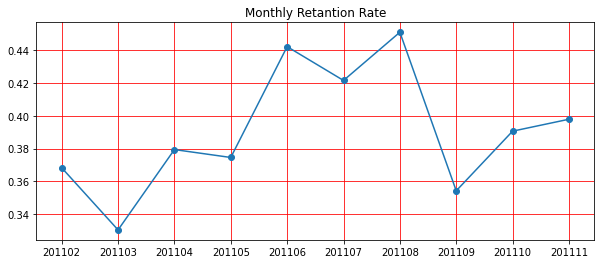

In [ ]:
plt.figure(figsize=(10,4))
plt.title('Monthly Retantion Rate')
plt.grid(c = 'red')
plt.plot(Retantion.query("MY_invoiceYearMonth < 201112")['MY_invoiceYearMonth'].to_numpy(dtype=str),Retantion.query("MY_invoiceYearMonth < 201112")['RetantionRate'] , marker='o')


months = Retantion.columns[2:]
